# Notebook #4: EDA: exploración de los datos

In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
df_descodificada = pd.read_csv('../../Datos/datos_defunciones/df_descodificada.csv', index_col=0)

In [3]:
df_descodificada['fecha'] = pd.to_datetime(df_descodificada['fecha'])

In [4]:
df_descodificada.head()

,fecha,region,provincia,dia_semana,mes,anio,rango_hora,tipo_via,sexo,grupo_edad,condicion_victima,tipo_accidente,medio_trans
0,2007-01-28,Región Cibao Norte,Espaillat,Sábado,Enero,2007,18:01-20:00,No declarada,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
1,2007-01-28,Región Cibao Norte,Espaillat,Domingo,Enero,2007,00:01-02:00,Carretera,Hombres,55-59,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
2,2007-02-28,Región Cibao Norte,Espaillat,Jueves,Febrero,2007,20:01-22:00,Carretera,Hombres,15-19,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
3,2007-02-28,Región Cibao Norte,Espaillat,Lunes,Febrero,2007,10:01-12:00,No declarada,Hombres,0-4,No declarada,Atropellamiento,Peatón atropellado
4,2007-03-28,Región Cibao Norte,Espaillat,Jueves,Marzo,2007,18:01-20:00,Carretera,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"


### Significado de Columnas

- **fecha**: Mes y año del fallecimiento. El día se establece como "28" ya que no se especifica el día exacto del mes. Solo se aporta el dato del día de la semana.
- **region**: Región donde ocurrió el accidente.
- **provincia**: Provincia donde ocurrió el accidente.
- **dia_semana**: Día de la semana en que ocurrió el accidente.
- **mes**: Mes en que ocurrió el accidente.
- **anio**: Año en que ocurrió el accidente.
- **rango_hora**: Intervalo de 2 horas en el que ocurrió el accidente.
- **tipo_via**: Tipo de vía donde ocurrió el accidente.
- **sexo**: Género de la persona fallecida.
- **grupo_edad**: intervalo de edad de la persona fallecida.
- **condicion_victima**: Papel que desempeñaba la persona en el accidente (e.g., conductor, peatón).
- **tipo_accidente**: Tipo de accidente ocurrido.
- **medio_trans**: Medio de transporte involucrado en el accidente.


## EDA

### Observaciones del DataFrame de Defunciones

- **Dimensiones**: El DataFrame contiene **31,351 filas** y **13 columnas**.
- **Duplicados**: Se identificaron **721 duplicados**, equivalentes a menos del 3% (**2.30%**). No se eliminan, ya que podrían corresponder a accidentes muy similares pero distintos. Además, los accidentes mortales no tienen una diferenciación clara entre los días, ya que solo se presenta el día de la semana, pero no la fecha exacta (columna creada manualmente).
- **Periodo de los datos**: Los datos abarcan desde **2007 hasta 2023**, divididos entre los 12 meses del año.
  - **Año con más defunciones**: El **2010** registró el mayor número de muertes por accidentes viales (**2,132**), seguido de **2019** y **2016** en el top 3. Los dos primeros superan las **2,000 defunciones**, mientras que el tercero queda ligeramente por debajo.
  - **Mes con más defunciones**: **Diciembre** lidera con **3,151 defunciones**, seguido de **marzo** y **julio**. En este periodo de tiempo a nivel nacional, todos los meses del año tienden incidencias que superan las **2,000 muertes**.
  - **Día con más defunciones**: El **domingo** es el día con más fallecidos, seguido de **sábado** y **lunes**. Aunque más alejado en números, el **viernes** ocupa el siguiente lugar. Esto indica que los fines de semana son los días más propensos a pérdidas de vidas por accidentes.
  - **Horas con más defunciones**: Los rangos horarios más peligrosos son:
    - **18:00 - 20:00**
    - **20:00 - 22:00**
    - **16:00 - 18:00**  
    Esto refleja un patrón alarmante pero lógico, ya que son horarios de alto tráfico vehicular.
  - **Regiones con más víctimas**: Las regiones con más defunciones son:
    - **Ozama**
    - **Cibao Norte**
    - **Cibao Sur**
  - **Provincias con más víctimas**: Las provincias con mayor cantidad de defunciones son:
    - **Santo Domingo**
    - **San Cristóbal**
    - **Santiago**
  - **Tipo de vía más peligrosa**: 
    - **Carretera**, seguida de **calle** y **avenida**. 
    - La **autopista** también registra un número considerable de defunciones.
  - **Género más afectado**: El **87%** de las víctimas son de género **masculino**.
  - **Grupo de edad más afectado**: Los grupos con más víctimas son:
    - **20-24 años**
    - **25-29 años**
    - **15-19 años**  
    Esto muestra que la mayoría de las defunciones corresponden a personas jóvenes.
  - **Condición de la víctima**: 
    - En el **41.88%** de los casos no se ha declarado la condición de la víctima.
    - El **40.19%** de las víctimas corresponde a **conductores**.
  - **Tipo de accidente más común**: Los accidentes más frecuentes son:
    - **Choques**
    - **Atropellamientos**
    - **Deslizamientos**
  - **Medio de transporte predominante**:
    - **Motocicletas** (**63.73%**)
    - **Peatones atropellados** (**18.42%**)
    - **Automóviles** en tercer lugar (**6.62%**).


In [5]:
f.exploracion_dataframe(df_descodificada)

El número de datos es 31351 y el de columnas es 13

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 721

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
fecha,datetime64[ns]
region,object
provincia,object
dia_semana,object
mes,object
anio,int64
rango_hora,object
tipo_via,object
sexo,object
grupo_edad,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna region tiene los siguientes valores únicos:


,count
region,
Región Ozama,6377
Región Cibao Norte,4644
Región Cibao Sur,3826
Región Valdesia,3489
Región Yuma,2951
Región Cibao Nordeste,2926
Región El Valle,2111
Región Higuamo,2056
Región Cibao Noroeste,1775


La columna provincia tiene los siguientes valores únicos:


,count
provincia,
Santo Domingo,4776
San Cristóbal,2373
Santiago,2325
La Vega,2168
La Altagracia,1919
Distrito Nacional,1601
Puerto Plata,1393
Duarte,1186
Monseñor Nouel,1073


La columna dia_semana tiene los siguientes valores únicos:


,count
dia_semana,
Domingo,7943
Sábado,5112
Lunes,5023
Viernes,3628
Jueves,3343
Martes,3254
Miércoles,3048


La columna mes tiene los siguientes valores únicos:


,count
mes,
Diciembre,3151
Marzo,2688
Julio,2686
Enero,2675
Octubre,2658
Noviembre,2605
Abril,2560
Febrero,2551
Mayo,2537


La columna rango_hora tiene los siguientes valores únicos:


,count
rango_hora,
18:01-20:00,3779
20:01-22:00,3600
16:01-18:00,2973
10:01-12:00,2581
14:01-16:00,2500
22:01-24:00,2442
00:01-02:00,2432
08:01-10:00,2354
12:01-14:00,2327


La columna tipo_via tiene los siguientes valores únicos:


,count
tipo_via,
Carretera,13836
Calle,6042
Avenida,4613
Autopista,4530
No declarada,1533
Autovía,340
Bulevar,156
Puente,128
Camino vecinal,83


La columna sexo tiene los siguientes valores únicos:


,count
sexo,
Hombres,27389
Mujeres,3891
No declarado,71


La columna grupo_edad tiene los siguientes valores únicos:


,count
grupo_edad,
No declarado,8134
20-24,4017
25-29,2974
15-19,2800
30-34,2365
35-39,1996
65 y más,1756
40-44,1599
45-49,1372


La columna condicion_victima tiene los siguientes valores únicos:


,count
condicion_victima,
No declarada,13132
Conductor,12600
Pasajero,2824
Peatón,2795


La columna tipo_accidente tiene los siguientes valores únicos:


,count
tipo_accidente,
Choque o colisión,17915
Atropellamiento,5779
Deslizamiento,5216
Estrellamiento,1282
Vuelco o vuelcadura,849
Caída,277
Aplastamiento,18
No declarado,12
Otros,3


La columna medio_trans tiene los siguientes valores únicos:


,count
medio_trans,
"Motocicleta, ciclomotor (passola)",19981
Peatón atropellado,5775
Automóvil (carro),2077
"Yipeta, yip",930
Camión,831
Camioneta,723
No declarado,364
Autobús,264
"Minibús, miniván",194


In [6]:
df_descodificada['anio'].value_counts().head() # cantidad de muertes por accidentes en cada año, primeros 5

anio
2010    2132
2019    2100
2016    1991
2023    1949
2015    1946
Name: count, dtype: int64

In [7]:
df_descodificada['grupo_edad'].value_counts(normalize=True) *100 # cantidad de muertes por grupo de edad

grupo_edad
No declarado   25.94
20-24          12.81
25-29           9.49
15-19           8.93
30-34           7.54
35-39           6.37
65 y más        5.60
40-44           5.10
45-49           4.38
50-54           4.12
55-59           3.17
60-64           2.75
10-14           1.48
0-4             1.17
5-9             1.14
Name: proportion, dtype: float64

In [8]:
df_descodificada['region'].value_counts(normalize=True) *100 # cantidad de muertes por grupo de edad

region
Región Ozama            20.34
Región Cibao Norte      14.81
Región Cibao Sur        12.20
Región Valdesia         11.13
Región Yuma              9.41
Región Cibao Nordeste    9.33
Región El Valle          6.73
Región Higuamo           6.56
Región Cibao Noroeste    5.66
Región Enriquillo        3.80
No declarada             0.02
Name: proportion, dtype: float64

In [9]:
df_descodificada['provincia'].value_counts(normalize=True) *100 # cantidad de muertes por grupo de edad

provincia
Santo Domingo             15.23
San Cristóbal              7.57
Santiago                   7.42
La Vega                    6.92
La Altagracia              6.12
Distrito Nacional          5.11
Puerto Plata               4.44
Duarte                     3.78
Monseñor Nouel             3.42
San Pedro de Macorís       3.38
Azua                       3.22
San Juan                   3.09
Espaillat                  2.95
Peravia                    2.90
María Trinidad. Sánchez    2.38
Valverde                   2.37
Monte Plata                2.32
La Romana                  2.26
Samaná                     1.93
Barahona                   1.91
Sánchez Ramírez            1.87
Monte Cristi               1.71
Hermanas Mirabal           1.24
Baoruco                    1.07
El Seibo                   1.04
Dajabón                    0.94
Hato Mayor                 0.85
San José de Ocoa           0.66
Santiago Rodríguez         0.65
Independencia              0.53
Elías Piña                 0.4

In [10]:
df_descodificada['tipo_via'].value_counts(normalize=True) *100 # cantidad de muertes por tipo de vía

tipo_via
Carretera        44.13
Calle            19.27
Avenida          14.71
Autopista        14.45
No declarada      4.89
Autovía           1.08
Bulevar           0.50
Puente            0.41
Camino vecinal    0.26
Elevado           0.11
Otras             0.11
Cruce             0.04
Tunel             0.03
Vía férrea        0.01
Name: proportion, dtype: float64

In [11]:
df_descodificada['sexo'].value_counts(normalize=True) *100 #cantidad de muertes según el género

sexo
Hombres        87.36
Mujeres        12.41
No declarado    0.23
Name: proportion, dtype: float64

- Los hombres son aquellos que más mueren, por encima de las mujeres.

In [12]:
df_descodificada['medio_trans'].value_counts(normalize=True).head() *100 #cantidad de muertes según el medio de transporte, primeros 5

medio_trans
Motocicleta, ciclomotor (passola)   63.73
Peatón atropellado                  18.42
Automóvil (carro)                    6.62
Yipeta, yip                          2.97
Camión                               2.65
Name: proportion, dtype: float64

- En los fallecidos por accidentes de tránsito, los principales medios involucrados fueron la moto (63.73%), un peatón (18.42%) y automóviles (6.62%)

In [13]:
df_num, df_cat = f.separar_dataframes(df_descodificada)

### Distribución gráfica de la cantidad de accidentes por años

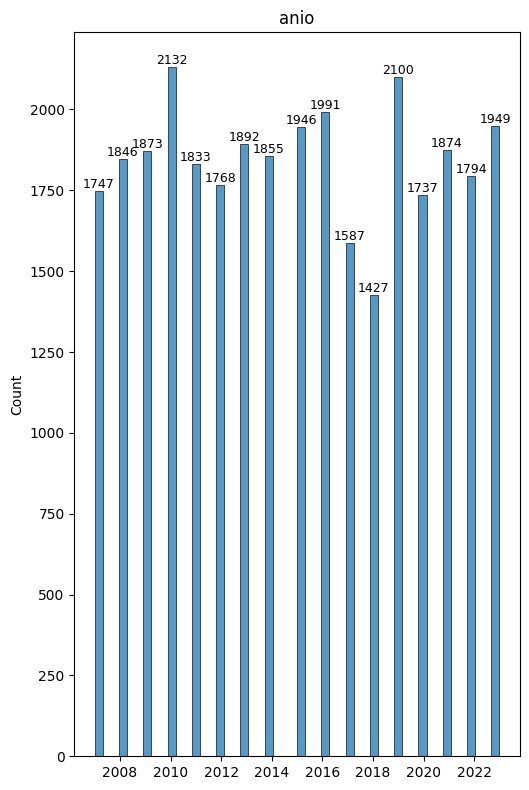

In [14]:
f.plot_numericas(df_num)

In [15]:
df_num.value_counts()

anio
2010    2132
2019    2100
2016    1991
2023    1949
2015    1946
2013    1892
2021    1874
2009    1873
2014    1855
2008    1846
2011    1833
2022    1794
2012    1768
2007    1747
2020    1737
2017    1587
2018    1427
Name: count, dtype: int64

### Distribución gráfica de columnas categóricas

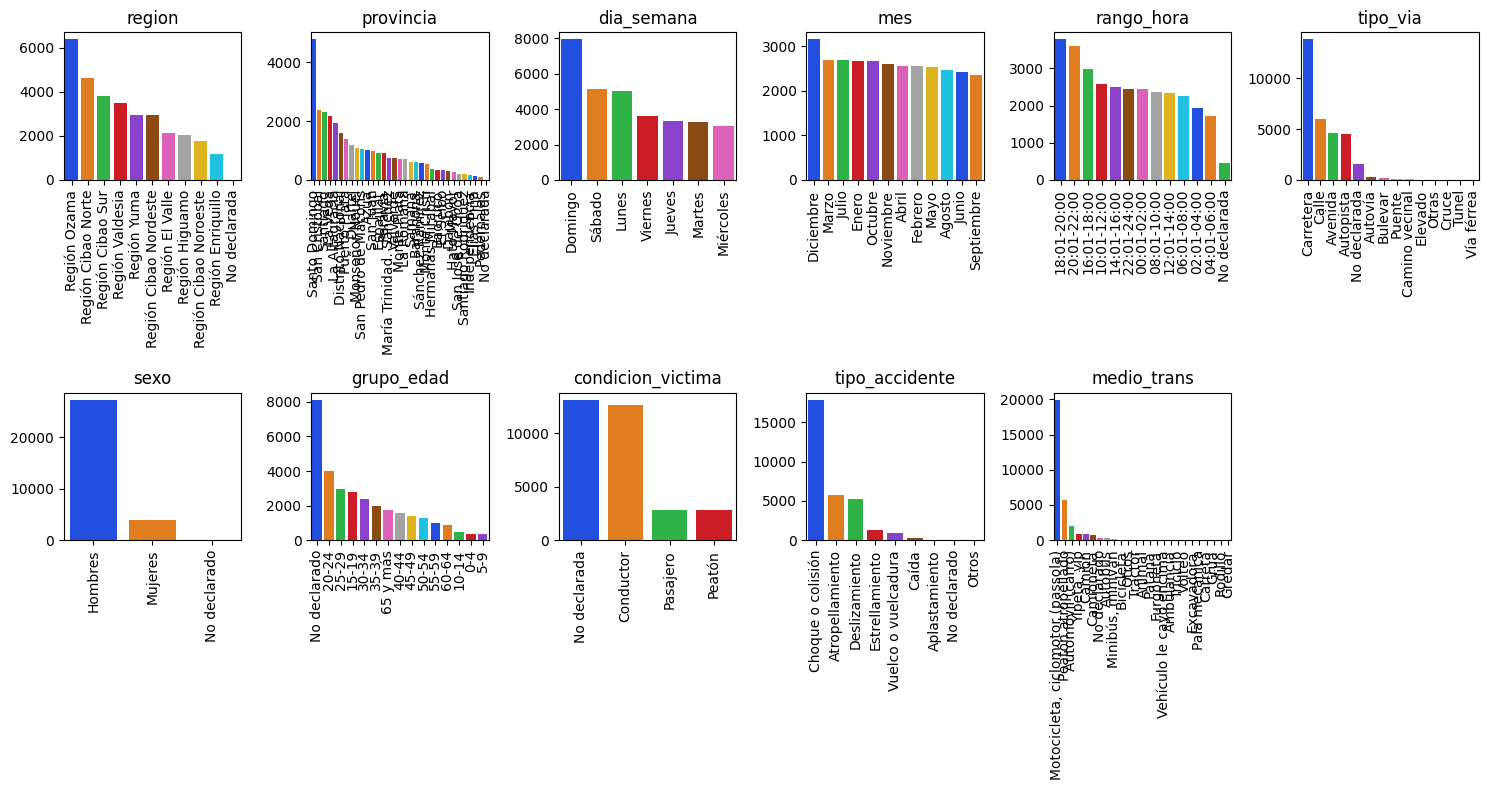

In [16]:
f.plot_categoricas(df_cat)

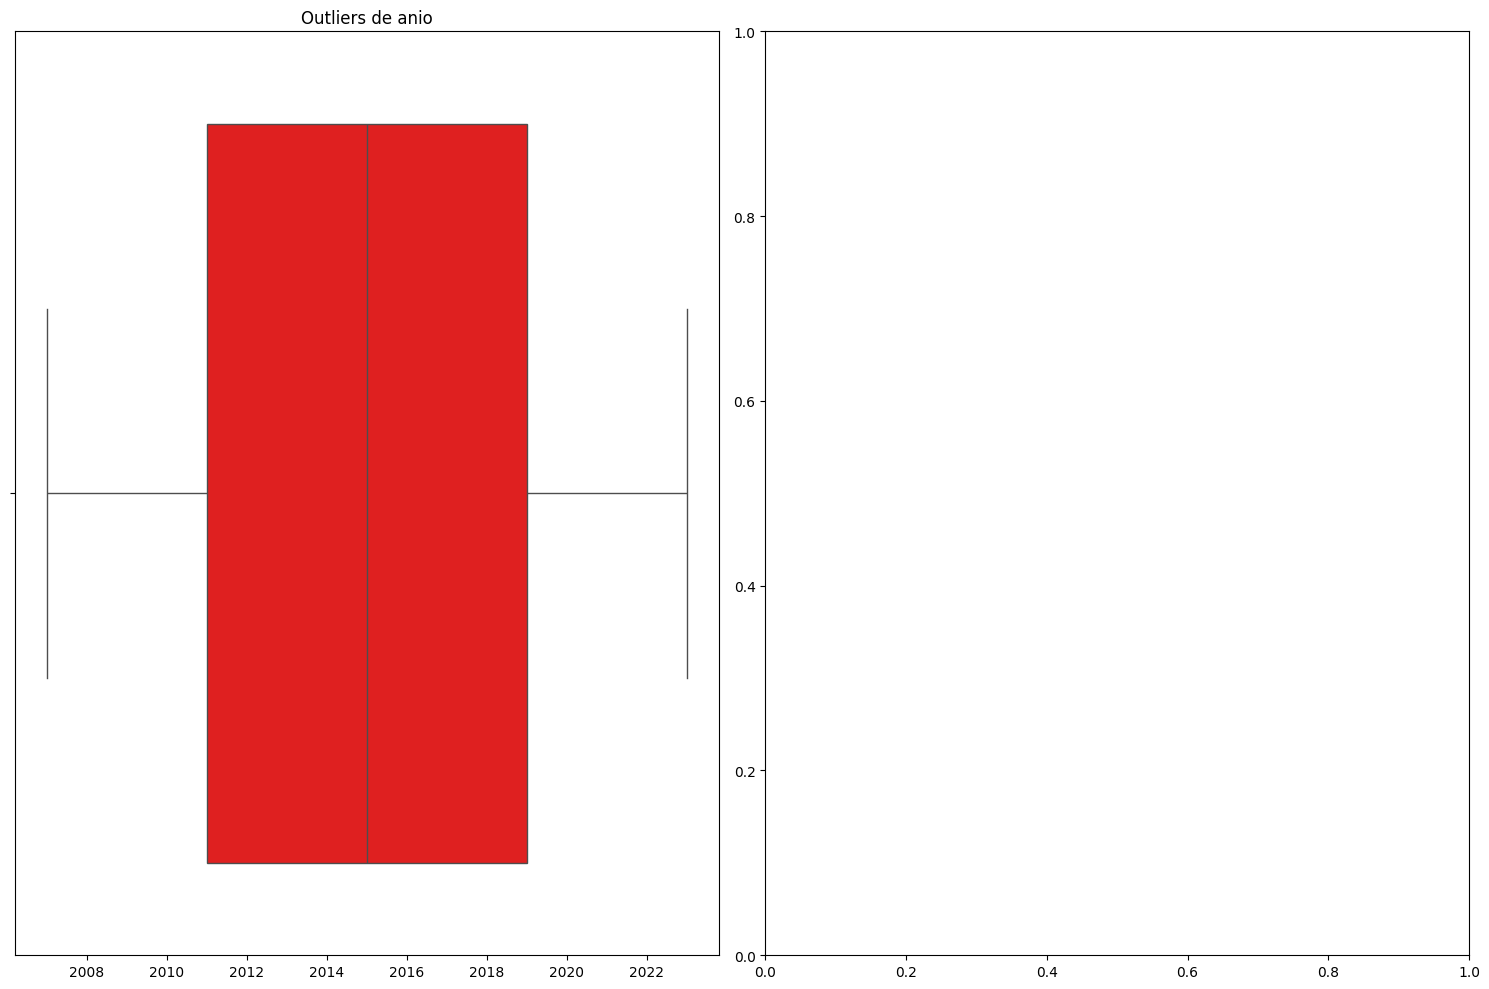

In [17]:
f.detectar_outliers(df_descodificada)

### Diferencias geográficas

In [18]:
df_descodificada.groupby(['region', 'provincia'])[['tipo_via']].count().sort_index() #distribución de muertes por región y provincia

tipo_via
region                provincia                        
No declarada          No declarada                    5
Región Cibao Nordeste Duarte                       1186
                      Hermanas Mirabal              388
                      María Trinidad. Sánchez       746
                      Samaná                        606
Región Cibao Noroeste Dajabón                       294
                      Monte Cristi                  535
                      Santiago Rodríguez            204
                      Valverde                      742
Región Cibao Norte    Espaillat                     926
                      Puerto Plata                 1393
                      Santiago                     2325
Región Cibao Sur      La Vega                      2168
                      Monseñor Nouel               1073
                      Sánchez Ramírez               585
Región El Valle       Azua                         1009
                      Elías Piña                    133
                      San Juan                      969
Región Enriquillo     Baoruco                       334
                      Barahona                      598
                      Independencia                 167
                      Pedernales                     92
Región Higuamo        Hato Mayor                    267
                      Monte Plata                   728
                      San Pedro de Macorís         1061
Región Ozama          Distrito Nacional            1601
                      Santo Domingo                4776
Región Valdesia       Peravia                       910
                      San Cristóbal                2373
                      San José de Ocoa              206
Región Yuma           El Seibo                      325
                      La Altagracia                1919
                      La Romana                     707

### Diferencias históricas por regiones

### Análisis Temporal de Muertes por Accidentes de Tránsito

- **Región Ozama**:  
  - Se ha mantenido en el **primer lugar** en cuanto a muertes por accidentes de tránsito, salvo en **2015**, cuando fue superada por la **Región Cibao Norte** (segundo lugar).  
  - Hasta **2013**, era común registrar más de **400 fallecidos** al año. Sin embargo, desde ese punto, el número de víctimas mostró reducciones.  
  - A partir de **2018**, las cifras comenzaron a oscilar nuevamente entre **300 y 400 fallecidos** por año.

- **Región Cibao Norte y Cibao Sur**:  
  - Las muertes por accidentes de tránsito en ambas regiones suelen oscilar entre **200 y 300 casos** anuales.  
  - En el caso de **Cibao Norte**, hubo años particulares (**2014, 2015, 2016, y 2019**) en los que las defunciones superaron las **300 víctimas**.

- **Región Valdesia**:  
  - Con frecuencia supera los **200 fallecidos** anualmente, aunque en ciertos años no alcanza esta cifra.  
  - Su valor más alto de defunciones se registró en el año más reciente: **2023**.


In [19]:
tabla_pivote_region = f.crear_tabla_pivote(df_descodificada, index='region', columns='anio', values='tipo_accidente', aggfunc='count')
tabla_pivote_region['Total'] = tabla_pivote_region.sum(axis=1) # que sume las filas
tabla_pivote_region = tabla_pivote_region.sort_values(by='Total', ascending=False)
tabla_pivote_region

anio,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
region,,,,,,,,,,,,,,,,,,
Región Ozama,446.00,495.00,455.00,496.00,418.00,419.00,426.00,355.00,299.00,322.00,271.00,280.00,392.00,321.00,308.00,326.00,348.00,6377.00
Región Cibao Norte,247.00,236.00,293.00,293.00,237.00,237.00,298.00,312.00,349.00,310.00,236.00,227.00,333.00,224.00,291.00,245.00,276.00,4644.00
Región Cibao Sur,179.00,210.00,233.00,276.00,224.00,202.00,214.00,222.00,253.00,255.00,218.00,161.00,281.00,217.00,239.00,214.00,228.00,3826.00
Región Valdesia,197.00,230.00,228.00,245.00,223.00,148.00,175.00,192.00,152.00,212.00,179.00,206.00,227.00,240.00,185.00,199.00,251.00,3489.00
Región Yuma,193.00,191.00,160.00,154.00,152.00,148.00,171.00,164.00,190.00,199.00,142.00,117.00,200.00,144.00,205.00,193.00,228.00,2951.00
Región Cibao Nordeste,136.00,135.00,134.00,190.00,168.00,185.00,187.00,189.00,218.00,233.00,188.00,116.00,189.00,166.00,154.00,175.00,163.00,2926.00
Región El Valle,79.00,87.00,124.00,153.00,130.00,117.00,111.00,118.00,137.00,125.00,129.00,133.00,151.00,114.00,134.00,140.00,129.00,2111.00
Región Higuamo,123.00,145.00,112.00,125.00,115.00,120.00,120.00,106.00,133.00,137.00,102.00,76.00,124.00,128.00,144.00,130.00,116.00,2056.00
Región Cibao Noroeste,77.00,62.00,75.00,102.00,96.00,111.00,121.00,118.00,132.00,126.00,70.00,76.00,123.00,116.00,140.00,108.00,122.00,1775.00


### Diferencias históricas por provincias

### Provincias con Mayor Cantidad de Muertes

- **Principales provincias**:  
  - Las provincias con mayor cantidad de muertes son:  
    - **Santo Domingo**  
    - **San Cristóbal**  
    - **Santiago**  
    - **La Vega**  
    - **La Altagracia**

- **Santo Domingo**:  
  - **Destaca** por duplicar el número de fallecidos en comparación con la provincia en segundo lugar.  
    - **Santo Domingo**: **4,776 fallecidos**  
    - **San Cristóbal**: **2,373 fallecidos**  
  - Hasta **2013**, Santo Domingo registraba más de **300 fallecidos** al año.  
  - Desde **2014**, el número de fallecidos no supera los **260 casos**, excepto en **2019**, cuando se registraron **301 defunciones**.

- **San Cristóbal**:  
  - Hasta **2010**, los fallecidos alcanzaron cifras más altas, llegando a **176 víctimas**.  
  - Desde **2011**, las muertes oscilan entre **100 y 160 casos** anuales.  
  - En los últimos cinco años, destaca **2020** con **163 fallecidos**.


In [20]:
tabla_pivote_provincia = f.crear_tabla_pivote(df_descodificada, index='provincia',
                                              columns='anio', 
                                              values='tipo_accidente', 
                                              aggfunc='count')
tabla_pivote_provincia['Total'] = tabla_pivote_provincia.sum(axis=1)  
tabla_pivote_provincia = tabla_pivote_provincia.sort_values(by='Total', ascending=False)
tabla_pivote_provincia

anio,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
provincia,,,,,,,,,,,,,,,,,,
Santo Domingo,329.00,372.00,341.00,393.00,319.00,313.00,311.00,243.00,235.00,254.00,210.00,197.00,301.00,246.00,220.00,237.00,255.00,4776.00
San Cristóbal,148.00,174.00,177.00,178.00,160.00,100.00,124.00,132.00,98.00,121.00,115.00,145.00,147.00,166.00,109.00,116.00,163.00,2373.00
Santiago,117.00,108.00,153.00,165.00,101.00,137.00,135.00,146.00,164.00,147.00,118.00,154.00,164.00,121.00,155.00,120.00,120.00,2325.00
La Vega,71.00,85.00,148.00,166.00,136.00,115.00,119.00,135.00,146.00,153.00,122.00,97.00,167.00,127.00,126.00,123.00,132.00,2168.00
La Altagracia,131.00,131.00,94.00,103.00,105.00,103.00,96.00,110.00,125.00,127.00,84.00,84.00,140.00,86.00,126.00,123.00,151.00,1919.00
Distrito Nacional,117.00,123.00,114.00,103.00,99.00,106.00,115.00,112.00,64.00,68.00,61.00,83.00,91.00,75.00,88.00,89.00,93.00,1601.00
Puerto Plata,82.00,88.00,90.00,78.00,80.00,75.00,104.00,94.00,99.00,88.00,57.00,39.00,107.00,64.00,78.00,73.00,97.00,1393.00
Duarte,61.00,63.00,60.00,90.00,66.00,94.00,68.00,64.00,104.00,116.00,74.00,44.00,64.00,56.00,52.00,60.00,50.00,1186.00
Monseñor Nouel,89.00,83.00,52.00,61.00,56.00,56.00,40.00,59.00,69.00,54.00,69.00,53.00,73.00,57.00,75.00,62.00,65.00,1073.00


### Diferencias por género

- **Fallecimientos por género (2007-2023)**:  
  - Han fallecido **27,389 hombres** en accidentes de tránsito a nivel nacional.  
  - En el caso del género femenino, se han registrado **3,891 casos** de fallecimientos en el mismo periodo.

- **Hombres**:  
  - Los hombres tienden a perder la vida principalmente en:
    - **Motocicletas**: **67.25%**  
    - **Atropellamientos en la calle**: **16.43%**  
    - **Automóviles**: **5.80%**

- **Mujeres**:  
  - Aunque las mujeres pierden la vida en los mismos medios, las proporciones difieren significativamente:
    - **Motocicletas**: **39.45%**  
    - **Peatones atropellados**: **32.30%**  
    - **Automóviles**: **12.20%**


In [21]:
df_genero_medio = df_descodificada.groupby(['sexo', 'medio_trans'])[['tipo_via']].count().sort_values(by=['sexo', 'tipo_via'], ascending=[True, False]) # agrupo por género y tipo de medio
df_genero_medio.rename(columns={'tipo_via': 'Conteo'}, inplace=True)
df_genero_medio['Total por Sexo'] = df_genero_medio.groupby(level=0)['Conteo'].transform('sum') #comparo el conteo de cada medio con el total del género en sí
df_genero_medio['Porcentaje (%)'] = (df_genero_medio['Conteo'] / df_genero_medio['Total por Sexo']) * 100 # busco el porcentaje de ese medio por el género agrupado
df_genero_medio

Conteo  Total por Sexo  \
sexo         medio_trans                                                 
Hombres      Motocicleta, ciclomotor (passola)   18421           27389   
             Peatón atropellado                   4501           27389   
             Automóvil (carro)                    1590           27389   
             Camión                                763           27389   
             Yipeta, yip                           672           27389   
             Camioneta                             618           27389   
             No declarado                          299           27389   
             Autobús                               175           27389   
             Minibús, miniván                      147           27389   
             Bicicleta                              80           27389   
             Otros                                  49           27389   
             Tractor                                18           27389   
             Animal                                 11           27389   
             Patana                                 10           27389   
             Furgoneta                               6           27389   
             Vehículo le cayó encima                 6           27389   
             Ambulancia                              5           27389   
             Triciclo                                5           27389   
             Volteo                                  3           27389   
             Carreta                                 2           27389   
             Excavadora                              2           27389   
             Grúa                                    2           27389   
             Pala mecánica                           2           27389   
             Gredar                                  1           27389   
             Rodillo                                 1           27389   
Mujeres      Motocicleta, ciclomotor (passola)    1535            3891   
             Peatón atropellado                   1257            3891   
             Automóvil (carro)                     475            3891   
             Yipeta, yip                           257            3891   
             Camioneta                             103            3891   
             Autobús                                88            3891   
             Camión                                 61            3891   
             No declarado                           61            3891   
             Minibús, miniván                       46            3891   
             Otros                                   4            3891   
             Bicicleta                               2            3891   
             Excavadora                              1            3891   
             Tractor                                 1            3891   
No declarado Motocicleta, ciclomotor (passola)      25              71   
             Peatón atropellado                     17              71   
             Automóvil (carro)                      12              71   
             Camión                                  7              71   
             No declarado                            4              71   
             Camioneta                               2              71   
             Ambulancia                              1              71   
             Autobús                                 1              71   
             Minibús, miniván                        1              71   
             Yipeta, yip                             1              71   

                                                Porcentaje (%)  
sexo         medio_trans                                        
Hombres      Motocicleta, ciclomotor (passola)           67.26  
             Peatón atropellado                          16.43  
             Automóvil (carro)                            5.81  
             Camión   

### Causas de Fallecimientos por Género

- **Hombres**:  
  - La mayoría de los hombres pierde la vida como resultado de una **colisión** (**59.05%**).  
  - Le siguen los casos de **deslizamientos** y **atropellamientos**, ambos con un **16%**, aunque con una diferencia muy pequeña entre ellos.

- **Mujeres**:  
  - Las mujeres también fallecen con mayor probabilidad en **choques** (**43.92%**).  
  - Les siguen los casos de **atropellamientos** (**32.38%**) y **deslizamientos** (**14.77%**).


In [22]:
df_genero_acc = df_descodificada.groupby(['sexo', 'tipo_accidente'])[['tipo_via']].count().sort_values(by=['sexo', 'tipo_via'], ascending=[True, False])
df_genero_acc.rename(columns={'tipo_via': 'Conteo'}, inplace=True)
df_genero_acc['Total por Sexo'] = df_genero_acc.groupby(level=0)['Conteo'].transform('sum')
df_genero_acc['Porcentaje %'] = df_genero_acc['Conteo'] / df_genero_acc['Total por Sexo'] * 100 # busco el porcentaje de ese tipo de accidente en consideración del total por sexo
df_genero_acc

Conteo  Total por Sexo  Porcentaje %
sexo         tipo_accidente                                           
Hombres      Choque o colisión     16175           27389         59.06
             Deslizamiento          4627           27389         16.89
             Atropellamiento        4502           27389         16.44
             Estrellamiento         1126           27389          4.11
             Vuelco o vuelcadura     692           27389          2.53
             Caída                   237           27389          0.87
             Aplastamiento            18           27389          0.07
             No declarado             11           27389          0.04
             Otros                     1           27389          0.00
Mujeres      Choque o colisión      1709            3891         43.92
             Atropellamiento        1260            3891         32.38
             Deslizamiento           575            3891         14.78
             Vuelco o vuelcadura     156            3891          4.01
             Estrellamiento          148            3891          3.80
             Caída                    40            3891          1.03
             Otros                     2            3891          0.05
             No declarado              1            3891          0.03
No declarado Choque o colisión        31              71         43.66
             Atropellamiento          17              71         23.94
             Deslizamiento            14              71         19.72
             Estrellamiento            8              71         11.27
             Vuelco o vuelcadura       1              71          1.41

#### Distribución de edad por género:

- Tanto para **hombres** como para **mujeres**, la categoría **No declarada** es la que presenta más casos:  
  - **26%** para los hombres.  
  - **25%** para las mujeres.

- **Hombres**:  
  - El grupo mayoritario es **20-24 años**, con un **13.20%** de los casos.  
  - Le siguen:  
    - **25-29 años**: **9.79%**.  
    - **15-19 años**: **8.96%**.  
  - Estos grupos más jóvenes (15-29 años) son los que presentan más fallecimientos.  
  - Esto se explica porque gran parte de la juventud que no tiene recursos para un automóvil recurre a las **motocicletas** como medio de transporte económico. Estas suelen utilizarse para:
    - Trabajos como **moto-taxi** o **mensajería**.
    - En algunos casos, actividades delictivas.  

- **Mujeres**:  
  - Los grupos más destacados son:
    - **20-24 años**: **10.30%**.  
    - **15-19 años**: **8.81%**.  
  - De manera sorprendente, el siguiente grupo más afectado es el de **65 años y más**, con un **7.63%**.


In [23]:
df_genero_edad = df_descodificada.groupby(['sexo', 'grupo_edad'])[['tipo_via']].count().sort_values(by=['sexo', 'tipo_via'], ascending=[True, False])
df_genero_edad.rename(columns={'tipo_via': 'Conteo'}, inplace=True)
df_genero_edad['Total por Sexo'] = df_genero_edad.groupby(level=0)['Conteo'].transform('sum')
df_genero_edad['Porcentaje (%)'] = (df_genero_edad['Conteo'] / df_genero_edad['Total por Sexo']) * 100
df_genero_edad

Conteo  Total por Sexo  Porcentaje (%)
sexo         grupo_edad                                          
Hombres      No declarado    7103           27389           25.93
             20-24           3616           27389           13.20
             25-29           2684           27389            9.80
             15-19           2456           27389            8.97
             30-34           2093           27389            7.64
             35-39           1787           27389            6.52
             65 y más        1458           27389            5.32
             40-44           1414           27389            5.16
             45-49           1206           27389            4.40
             50-54           1144           27389            4.18
             55-59            876           27389            3.20
             60-64            739           27389            2.70
             10-14            349           27389            1.27
             0-4              240           27389            0.88
             5-9              224           27389            0.82
Mujeres      No declarado     963            3891           24.75
             20-24            401            3891           10.31
             15-19            343            3891            8.82
             65 y más         297            3891            7.63
             25-29            290            3891            7.45
             30-34            271            3891            6.96
             35-39            209            3891            5.37
             40-44            185            3891            4.75
             45-49            166            3891            4.27
             50-54            147            3891            3.78
             5-9              133            3891            3.42
             0-4              128            3891            3.29
             60-64            123            3891            3.16
             55-59            119            3891            3.06
             10-14            116            3891            2.98
No declarado No declarado      68              71           95.77
             15-19              1              71            1.41
             30-34              1              71            1.41
             65 y más           1              71            1.41

### Distribución de grupo_edad por medio de transporte

- Las edades con mayor cantidad de fallecidos siguen un patrón similar al de los hombres.  
- **Motocicletas**:  
  - Predominan como el medio de transporte más involucrado en los accidentes fatales.  
  - Los rangos de edad más afectados son:  
    - **No declarado** (mayoritario).  
    - **20-24 años**.  
    - **15-19 años**.

    - **Tipos de accidente**:  
  - Los mismos grupos de edades predominantes se mantienen en relación con los tipos de accidente.  
  - Destacan especialmente los **choques** y los **atropellamientos**, que son las principales causas de fallecimientos en estos grupos.

In [24]:
df_descodificada.groupby(['grupo_edad', 'medio_trans'])[['tipo_via']].count().sort_values(by='tipo_via', ascending=False).head(10)

,,tipo_via
grupo_edad,medio_trans,
No declarado,"Motocicleta, ciclomotor (passola)",4976
20-24,"Motocicleta, ciclomotor (passola)",3214
15-19,"Motocicleta, ciclomotor (passola)",2279
25-29,"Motocicleta, ciclomotor (passola)",2203
30-34,"Motocicleta, ciclomotor (passola)",1661
No declarado,Peatón atropellado,1399
35-39,"Motocicleta, ciclomotor (passola)",1352
65 y más,Peatón atropellado,1042
40-44,"Motocicleta, ciclomotor (passola)",1010


In [25]:
df_descodificada.groupby(['grupo_edad', 'tipo_accidente'])[['tipo_via']].count().sort_values(by='tipo_via', ascending=False).head(10)

tipo_via
grupo_edad   tipo_accidente             
No declarado Choque o colisión      4847
20-24        Choque o colisión      2514
15-19        Choque o colisión      1857
25-29        Choque o colisión      1820
30-34        Choque o colisión      1442
No declarado Atropellamiento        1398
             Deslizamiento          1363
35-39        Choque o colisión      1201
65 y más     Atropellamiento        1042
40-44        Choque o colisión       951

## Función prueba

In [26]:
# Consultar tipos de accidente por año en una provincia o region particular
f.consulta_tipo_accidente(df_descodificada, anio=2020, filtro_columna="provincia", filtro_valor="Distrito Nacional")

,Tipo de Accidente,Cantidad
0,Choque o colisión,47
1,Atropellamiento,21
2,Estrellamiento,5
3,Caída,1
4,Aplastamiento,1


In [27]:
# Consultar tipos de accidente por año en una comparativa entre 2 regiones o provincias
f.comparar_tipo_accidente(df_descodificada, anio=2007, filtro_columna="region", valor1="Región Cibao Norte", valor2="Región Ozama")

,Tipo de Accidente,Cantidad en Región Cibao Norte,Cantidad en Región Ozama
0,Choque o colisión,151,170
1,Atropellamiento,50,190
2,Deslizamiento,27,34
3,Vuelco o vuelcadura,12,19
4,Caída,4,8
5,Estrellamiento,3,25


## Llamadas particulares sobre los datos

In [28]:
f.consulta_accidentes_interactiva(df_descodificada)

,tipo_accidente,cantidad
3,Choque o colisión,17915
1,Atropellamiento,5779
4,Deslizamiento,5216
5,Estrellamiento,1282
8,Vuelco o vuelcadura,849
2,Caída,277
0,Aplastamiento,18
6,No declarado,12
7,Otros,3


In [29]:
f.comparar_accidentes_interactiva(df_descodificada)

ValueError: Debes proporcionar al menos una región o provincia para la primera comparación.